In [2]:
from fileloader import *
from trainwrapper import *
import inspect
'''
This file will guide you through the process of training a model on the dataset with the given toolkit.
A basic model performace analysis is also included, other analysis can be done by using the tools in the toolkit.
We will use sythetic data in this demo.
'''
source_code = inspect.getsource(generate)# check the generation function, identical to the one in the randomdatagen.py
print(source_code)

def generate():
    """
    Generates synthetic dataset containing biological indicators, survey data,
    disease prevalence, and associated ages for a specified number of samples.
    
    Returns:
        X (numpy.ndarray): Independent variables including biological indicators,
                           survey responses, and current ages for each disease.
        y (numpy.ndarray): Dependent variables representing label ages for each disease.
        e (numpy.ndarray): Disease status indicators (0 or 1) for each disease.
    """
    np.random.seed(0)
    num_samples = datacount
    num_diseases = 60  # Number of diseases

    biosize = 65
    surveysize = 10
    biocount = 100
    surveycount = 15
    # 1. Generate biological indicator data
    # Assume each biological indicator follows a normal distribution, parameters set based on common biological indicators
    bio_data = {}
    for i in range(biocount):
        loc = 0
        scale = 1
        # Our process uses standardized 

In [3]:
dummy=7
commands=[]
gpu=0
for category in [dummy]:# specify the category of the dataset here, 7 for dummy dataset, see above output for more details
    for model in [1]:# choose your model, 0 for POPDX, 1 for FCNN, 2 for logit, 3 for MITH, note that only 1 and 2 are available for the dummy dataset since other two require pretrained embeddings
        for hyperparameter in range(15):# choose the hyperparameter setting, use range(15) for all parameters, see details in trainer.py
            if category ==7:
                xtype=3
            else:
                xtype=0
            c=cmdfull(category,model,hyperparameter,xtype,folder,ava_gpus(gpu))# this generates the shell command to use the standard (cmdfull) training model, see more in trainwrapper.py
            commands.append(c)# add to the list of commands to be executed
            gpu+=1# call next gpu to avoid overloading

# the following code is for the survival analysis, with the same structure as above
for category in [dummy]:
    for model in [1]:
        if category ==7:
            xtype=3
        else:
            xtype=0
        c=cmdsurv(category,model,0,xtype,folder,ava_gpus(gpu))
        commands.append(c)
        gpu+=1
                

In [4]:
print(commands)# check the commands

['python ./trainer.py 7 1 0 3 1 1015\n', 'python ./trainer.py 7 1 1 3 2 1015\n', 'python ./trainer.py 7 1 2 3 3 1015\n', 'python ./trainer.py 7 1 3 3 4 1015\n', 'python ./trainer.py 7 1 4 3 5 1015\n', 'python ./trainer.py 7 1 5 3 6 1015\n', 'python ./trainer.py 7 1 6 3 7 1015\n', 'python ./trainer.py 7 1 7 3 1 1015\n', 'python ./trainer.py 7 1 8 3 2 1015\n', 'python ./trainer.py 7 1 9 3 3 1015\n', 'python ./trainer.py 7 1 10 3 4 1015\n', 'python ./trainer.py 7 1 11 3 5 1015\n', 'python ./trainer.py 7 1 12 3 6 1015\n', 'python ./trainer.py 7 1 13 3 7 1015\n', 'python ./trainer.py 7 1 14 3 1 1015\n', 'python ./trainersurv.py 7 1 0 3 2 1015\n']


In [ ]:
for command in commands:
    os.system(command)# execute the command, parallel training is supported by the toolkits but not available in jupyter, see trainwrapper.py for details

We will demonstrate using the output of FCNN on the dummy dataset 

Check auc output files first

In [5]:
AUC_files=[]
for i in sorted(os.listdir(folder)):
    if '.npy' in i:
        if '_' in i:
            print(i)
            AUC_files.append(i)

713_0.npy
713_1.npy
713_10.npy
713_11.npy
713_12.npy
713_13.npy
713_2.npy
713_3.npy
713_4.npy
713_5.npy
713_6.npy
713_7.npy
713_8.npy
713_9.npy


The first 3 number corresponds to category model xtype, the number after '_' corresponds to hyperparameter.

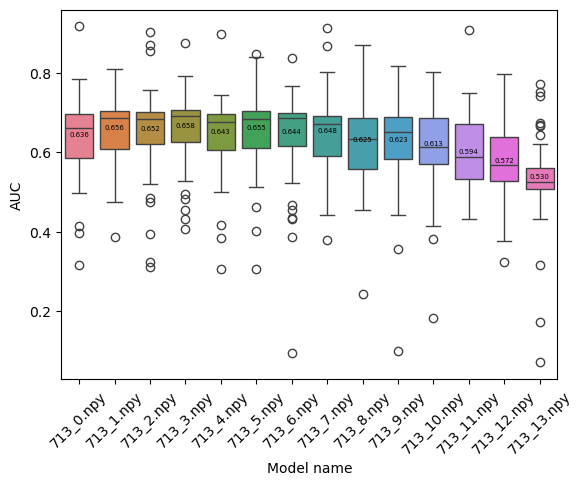

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
def s(x):
    return int(x.split('_')[1].split('.')[0])
ordered_data=[]
for i in sorted(AUC_files,key=s):
    ordered_data.append(np.load(f'{folder}/{i}'))
plt.figure(dpi=100)
mean_values = [np.nanmean(method) for method in ordered_data]
for i, mean in enumerate(mean_values):
    plt.text(i, mean, f'{mean:.3f}', ha='center', va='bottom', fontsize=5)
sns.boxplot(data=ordered_data)
plt.xticks(np.arange(len(ordered_data)), sorted(AUC_files,key=s), rotation=45)
plt.xlabel('Model name')
plt.ylabel('AUC')
plt.show()